Introduction to ECG:

Total samples: 43081
Sample frequency of 750Hz, with 12-bit resolution
MaximumfFrequency component of the original signal is at least 375Hz
Total sample time is: 57.441 seconds


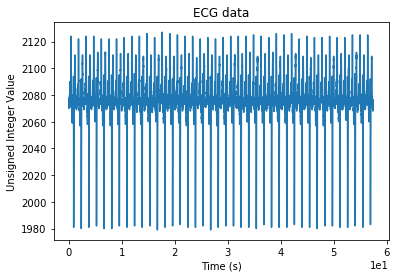

In [1]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#Open the dat file and plot the signal

data = open('aami3a.dat','rb')  
Signal = np.fromfile(data,count=-1,dtype=np.uint16)


txt=str(len(Signal))
txt2=str(round((len(Signal)*(1/750)),3))

print('Total samples: '+txt)
print('Sample frequency of 750Hz, with 12-bit resolution')
print('MaximumfFrequency component of the original signal is at least 375Hz')
print('Total sample time is: '+txt2+' seconds')

x=np.arange(0,43081/750.,1/750.)#start,stop,step
plt.plot(x,Signal[0:43081])
plt.title('ECG data')
plt.xlabel('Time (s)')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))




Assume 80 beats/min, which is about 1.33 beats/sec. 5 beats is approximately 6.665s. With a sample period of 1.333ms there should be about 5000 samples to obtain 5 beats in the signal.

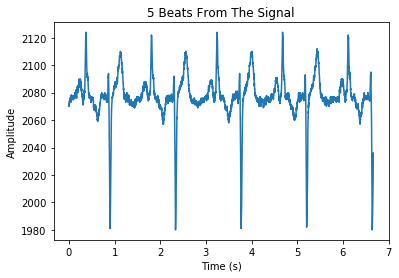

In [2]:
#Plots 5000 samples from the ECG file.
x=np.arange(0,5000/750.,1/750.)
plt.plot(x,Signal[0:5000])
plt.title('5 Beats From The Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

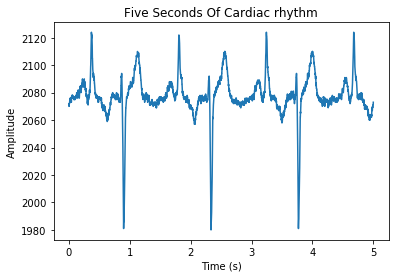

In [3]:
# PLot a zoom-in of the signal where 5 cardiac cycles can be observed considering this
# person has a cardiac cycle of 60 beats/minute. (Zoom in on five seconds)
x=np.arange(0,43081/750.,1/750.)
inx=np.where(x>5)  
inx=inx[0]
plt.plot(x[:inx[0]], Signal[:inx[0]])
plt.title('Five Seconds Of Cardiac rhythm')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

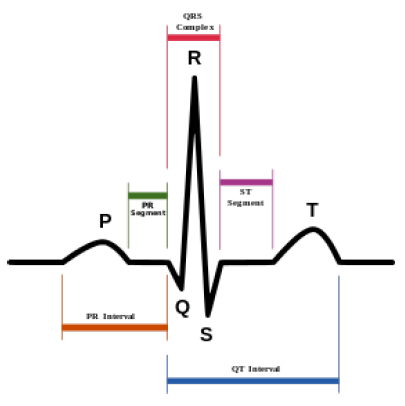

In [4]:
from IPython.display import Image
Image(filename='ECG_typ_sig.png')

In [5]:
# %matplotlib nbagg

# plt.plot(x,Signal[0:43081])
# plt.title('ECG data')
# plt.xlabel('Time (s)')
# plt.ylabel('Unsigned Integer Value')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


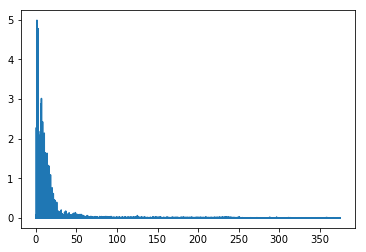

In [6]:
%matplotlib inline

Line=Signal[:43081]
dataF=Line-np.mean(Line)
f=np.arange(0,750/2.,750/43081.)
Y=np.fft.fft(dataF)
L=len(dataF)
ECG_FFT=abs(Y)/L
plt.plot(f, ECG_FFT[:21541])


Frequency with maximum amplitude is: 1.393Hz with a peak of: 4.982


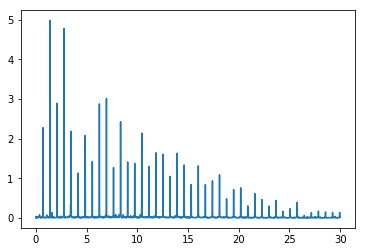

In [7]:
#Zoom into range of 0-30Hz
inx=np.where(f>30)
inx=inx[0]
plt.plot(f[0:inx[0]], ECG_FFT[0:inx[0]])


#Max frequency component between 0 - 2.5Hz and contains an amplitude of approximately 5
#Step size (750/4308) * 2.5 = 143 > choose 150 for loop eange

for i in range (0,150):
    if(ECG_FFT[i]) > 4.75:
        x = i

X = (750/43081)*x       
freq_m =str(round(X,3))
max_peak = str(round(np.max(ECG_FFT),3))

print('Frequency with maximum amplitude is: '+freq_m+'Hz with a peak of: '+max_peak)


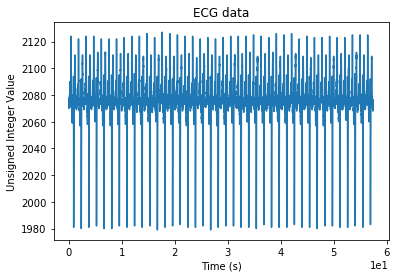

In [8]:
%matplotlib inline
x=np.arange(0,43081/750.,1/750.)#start,stop,step
plt.plot(x,Signal[0:43081])
plt.title('ECG data')
plt.xlabel('Time (s)')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

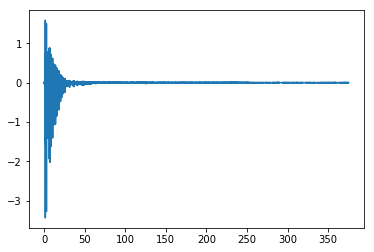

In [13]:
from scipy import signal

line = ECG_FFT[:21541]
filter_hz = 100
sample_freq = 750
b, a = signal.butter(4, filter_hz/(sample_freq/2.), btype='high')
sf = signal.lfilter(b,a,line)
plt.plot(f,sf)